# Nightscout Join Analysis
author: Spencer Weston

In this notebook, I explore options for joining/unioning all of the night scout data using a local copy of subject 00221634's data folder.

In [196]:
import os
import numpy as np
import pandas as pd 
import re 
from datetime import datetime, timedelta, timezone
import pytz

## Folder and CSV structure
Evaluate how many files are in each folder and take a look at the file structure.

In [197]:
os.getcwd()

'C:\\Users\\spenc\\Documents\\Berkeley\\Capstone\\BGPredict\\Notebooks'

In [198]:
device_status_location = "..\\..\\NightScoutTestFolder\\00221634_devicestatus_2018-03-01_to_2018-08-05_csv"
device_status_csvs = os.listdir(device_status_location)
print(device_status_csvs)
pd.read_csv(f"{device_status_location}\\{device_status_csvs[0]}").head()

['00221634_devicestatus_2018-03-01_to_2018-08-05_aa.csv', '00221634_devicestatus_2018-03-01_to_2018-08-05_ab.csv', '00221634_devicestatus_2018-03-01_to_2018-08-05_ac.csv', '00221634_devicestatus_2018-03-01_to_2018-08-05_ad.csv']


C:\Users\spenc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (249) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,NSCLIENT_ID,_id,created_at,pump/extended/ActiveProfile,pump/extended/PumpIOB,pump/extended/BaseBasalRate,pump/extended/LastBolus,pump/extended/Version,pump/extended/LastBolusAmount,pump/reservoir,...,openaps/enacted/predBGs/ZT/44,openaps/enacted/predBGs/ZT/45,openaps/enacted/predBGs/ZT/46,openaps/enacted/predBGs/ZT/47,openaps/enacted/predBGs/COB/45,openaps/enacted/predBGs/COB/46,openaps/enacted/predBGs/UAM/47,openaps/enacted/predBGs/COB/47,openaps/suggested/carbsReq,openaps/enacted/carbsReq
0,1.533427e+12,5b663df1f64f437f0a9d94db,2018-08-04T23:59:45Z,MM - v4,1.37,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.533426e+12,5b663949f64f437f0a9d94d5,2018-08-04T23:39:53Z,MM - v4,1.77,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.533425e+12,5b663496f64f437f0a9d94d0,2018-08-04T23:19:50Z,MM - v4,2.55,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.533424e+12,5b663049f64f437f0a9d94cb,2018-08-04T23:01:09Z,MM - v4,2.55,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.533424e+12,5b663011f64f437f0a9d94c9,2018-08-04T23:00:33Z,MM - v4,1.57,0.52,05.08.2018 00:10:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.5,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
entries_location = "..\\..\\NightScoutTestFolder\\00221634_entries_2018-03-01_to_2018-08-05.json_csv"
entries_csvs = os.listdir(entries_location)
print(entries_csvs)
pd.read_csv(f"{entries_location}\\{entries_csvs[0]}", header=None).head()

['00221634_entries_2018-03-01_to_2018-08-05.json.csv']


,0,1
0,2018-08-04T23:58:50Z,150
1,2018-08-04T23:53:51Z,153
2,2018-08-04T23:48:51Z,155
3,2018-08-04T23:43:51Z,159
4,2018-08-04T23:38:51Z,164


In [200]:
profile_location = "..\\..\\NightScoutTestFolder\\00221634_profile_2018-03-01_to_2018-08-05_csv"
profile_csvs = os.listdir(profile_location)
print(profile_csvs)
pd.read_csv(f"{profile_location}\\{profile_csvs[0]}").head()

['00221634_profile_2018-03-01_to_2018-08-05_aa.csv']


,_id,defaultProfile,startDate,created_at,units,store/FirstOne/delay,store/FirstOne/startDate,store/FirstOne/target_high/0/time,store/FirstOne/target_high/0/value,store/FirstOne/target_high/0/timeAsSeconds,...,store/Nightly 2/basal/20/timeAsSeconds,store/Nightly 2/basal/21/time,store/Nightly 2/basal/21/value,store/Nightly 2/basal/21/timeAsSeconds,store/Nightly 2/basal/22/time,store/Nightly 2/basal/22/value,store/Nightly 2/basal/22/timeAsSeconds,store/Nightly 2/basal/23/time,store/Nightly 2/basal/23/value,store/Nightly 2/basal/23/timeAsSeconds
0,5b6557b046344f1533e36e2f,MM - v4,2018-08-04T07:36:00.000Z,2018-01-11T20:48:22.574Z,mg/dl,20,1970-01-01T00:00:00.000Z,00:00,140,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5affc5d7295521644f95de54,MM - v3,2018-05-19T06:35:00.000Z,2018-01-11T20:48:22.574Z,mg/dl,20,1970-01-01T00:00:00.000Z,00:00,140,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5adf9e3cc8ed4429ce5de0a5,Evening BRT,2018-04-24T21:13:00.000Z,2018-01-11T20:48:22.574Z,mg/dl,20,1970-01-01T00:00:00.000Z,00:00,140,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ad89f97291f7d14a81ac02f,BRT-3,2018-04-19T13:54:00.000Z,2018-01-11T20:48:22.574Z,mg/dl,20,1970-01-01T00:00:00.000Z,00:00,140,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ac53f175d664710fbf75055,Autotune 5,2018-03-31T22:01:00.000Z,2018-01-11T20:48:22.574Z,mg/dl,20,1970-01-01T00:00:00.000Z,00:00,140,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
treatments_location = "..\\..\\NightScoutTestFolder\\00221634_treatments_2018-03-01_to_2018-08-05_csv"
treatments_csvs = os.listdir(treatments_location)
print(treatments_csvs)
pd.read_csv(f"{treatments_location}\\{treatments_csvs[0]}").head()

['00221634_treatments_2018-03-01_to_2018-08-05_aa.csv', '00221634_treatments_2018-03-01_to_2018-08-05_ab.csv']


,_id,insulin,NSCLIENT_ID,created_at,notes,eventType,date,isSMB,carbs,enteredBy,...,boluscalc/bgdiff,timestamp,sysTime,uuid,preBolus,isFakedTempBasal,originalExtendedAmount,timeshift,percentage,CircadianPercentageProfile
0,5b663afaf64f437f0a9d94d7,NaN,1.533426e+12,2018-08-04T23:47:05Z,Fritt,Carb Correction,1.533426e+12,False,17.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5b663034f64f437f0a9d94ca,1.0,1.533424e+12,2018-08-04T23:01:08Z,NaN,Correction Bolus,1.533424e+12,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5b662477f64f437f0a9d94bc,1.5,1.533421e+12,2018-08-04T22:10:26Z,NaN,Correction Bolus,1.533421e+12,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5b662477f64f437f0a9d94bb,1.5,1.533421e+12,2018-08-04T22:10:26Z,NaN,Correction Bolus,1.533421e+12,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5b661f53f64f437f0a9d94b2,0.5,1.533419e+12,2018-08-04T21:49:05Z,NaN,Correction Bolus,1.533419e+12,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Union Treatments and Device Status
There are two treatment folders and four device status folders. These will need to be unioned into single files.

### Device Status Union


In [202]:
print(device_status_csvs)
df_aa = pd.read_csv(f"{device_status_location}\\{device_status_csvs[0]}")
df_ab = pd.read_csv(f"{device_status_location}\\{device_status_csvs[1]}")
df_ac = pd.read_csv(f"{device_status_location}\\{device_status_csvs[2]}")
df_ad = pd.read_csv(f"{device_status_location}\\{device_status_csvs[3]}")

['00221634_devicestatus_2018-03-01_to_2018-08-05_aa.csv', '00221634_devicestatus_2018-03-01_to_2018-08-05_ab.csv', '00221634_devicestatus_2018-03-01_to_2018-08-05_ac.csv', '00221634_devicestatus_2018-03-01_to_2018-08-05_ad.csv']


C:\Users\spenc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (249) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\spenc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (182,357) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\spenc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (79,157,469,490) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [203]:
print(df_aa.shape)
print(df_ab.shape)
print(df_ac.shape)
print(df_ad.shape)

(15000, 445)
(15000, 445)
(15000, 648)
(8877, 506)


Unfortunately, not all dataframes have the same number of columns. Lets try to figure out the differences. 

The `aa` columns are printed as reference (needs a lot of scrolling, but vertical format is more readable). 

In [204]:
aa_cols = list(df_aa.columns)
# aa_cols

Next, calculate the set difference of every dataframe to every other dataframe. We compare `aa` to `ab` even though they have the same number of columns because columns may be substituted in place.

In [205]:
col_sets = {}
set_diffs = {}
df_dict = {"aa": df_aa, "ab": df_ab, "ac": df_ac, "ad":df_ad}
for key, df in df_dict.items():
    col_sets.update({key:set(df.columns)})
for key1, set1 in col_sets.items():
    for key2, set2 in col_sets.items():
        if key1 == key2:
            pass
        else:
            diff = set1.difference(set2)
#             print(f"Columns in {key1} but not in {key2}: \n {diff}")
            set_diffs.update({f"{key1}-{key2}": diff})

Evaluating the count differences of columns between dataframes

In [206]:
for k, v in set_diffs.items():
    print(k, len(v))

aa-ab 0
aa-ac 0
aa-ad 146
ab-aa 0
ab-ac 0
ab-ad 146
ac-aa 203
ac-ab 203
ac-ad 148
ad-aa 207
ad-ab 207
ad-ac 6


Many of these columns start with something like `openaps/enacted/predBGs` or `openaps/suggestd/predBGs`. Then, we have endings such as `aCOB/63`, `IOB`, and `COB`. I guess these are "active carbs on board", "insulin on board", and "carbs on board". If these only occur across dataframes, we can fill in null columns on all dataframes as a superset of all columns across all dataframes.

First, let's check whether all columns in the set differences follow this pattern. For example, we want to make sure the `_id` column isn't in a set difference. That would be a problem! 

In [207]:
all_set_diff_cols = set()
total_counter = 0
for k, val in set_diffs.items():
    if val:
        total_counter += len(val)
        all_set_diff_cols = all_set_diff_cols.union(val)
print(f"Size of total set: {total_counter}")
print(f"Size of unique set: {len(all_set_diff_cols)}")

Size of total set: 1266
Size of unique set: 355


In [208]:
# all_set_diff_cols

In [209]:
# Identify all variables after `openaps/suggested/predBGs`
predBG_expected_matches = []
openaps_suggested_predbg = re.compile("openaps\/suggested\/predBGs\/.*")
for i in all_set_diff_cols:
    if openaps_suggested_predbg.match(i):
        predBG_expected_matches.append(i)
predBG_expected_matches
unique_vars = set()
for i in predBG_expected_matches:
    strip = i.replace("openaps/suggested/predBGs/", "")
    idx = strip.index("/")
    strip = strip[:idx]
    unique_vars.add(strip)
unique_vars

{'COB', 'IOB', 'UAM', 'ZT', 'aCOB'}

The above list is each unique variable "group" that comes after `openaps/suggestedpredBGs`. After that, each is numbered. We'll repeat this process for remaining variables. 

In [210]:
predBG_suggested_matches = []
remaining_columns=all_set_diff_cols.difference(predBG_expected_matches)
openaps_enacted_predbg = re.compile("openaps\/enacted\/predBGs\/.*")
for i in all_set_diff_cols:
    if openaps_enacted_predbg.match(i):
        predBG_suggested_matches.append(i)
predBG_suggested_matches
unique_vars = set()
for i in predBG_suggested_matches:
    strip = i.replace("openaps/enacted/predBGs/", "")
    idx = strip.index("/")
    strip = strip[:idx]
    unique_vars.add(strip)
print(unique_vars)

{'UAM', 'ZT', 'COB', 'aCOB', 'IOB'}


Same result as above. "Suggested" and "enacted" have the same variable structure. The remaining variables are:
* `openaps/[suggested, enacted]/[carbsReq, snoozeBG, units]`
* `uploader/battery`

In [211]:
remaining_columns.difference(predBG_suggested_matches)

{'openaps/enacted/carbsReq',
 'openaps/enacted/snoozeBG',
 'openaps/enacted/units',
 'openaps/suggested/carbsReq',
 'openaps/suggested/snoozeBG',
 'openaps/suggested/units',
 'uploader/battery'}

[This site explains](https://openaps.readthedocs.io/en/latest/docs/While%20You%20Wait%20For%20Gear/Understand-determine-basal.html) a lot of these variables.
* IOB = insulin on board, predictions generated with only the insulin on board taken into account
* ZT = "zero temp", a worst-case scenario where carb absorbtion ceases and a basal rate of 0 zero was applied until blood glucose rises to the target blood glucose
* COB = "Carbs on board", predictions based on announced meals with an estimate of carbs consumed
* UAM = "unannounced meal", predictions based on an unannounced meal that attempts to predict how high blood glucose will rise.

We might also guess that `carbsReq` would be the number of carbs required to (a) raise a low blood glucose into the normal range or (b) the anticipated carbs needed to avoid a low blood glucose. `units` likely refers to units of insulin. In the `enacted/units` case, this likely refers to actual units of insulin dosed whereas `suggested/units` is a suggestion of some sort. 

Really, all this data appears to come from OpenAPS which is an artificial pancreas system. We should explore how many individuals have these predictions. We can be fairly sure that AndroidAPS (artificial pancrease system) has some sort of built in prediction as well. 

Back to the union, we effectively want to create artificial columns such that each dataframe's columns equal the super set of all dataframes' columns (e.g. col(aa) == col(aa) + col(ab) + col(ac) + col(ad)). 

In [212]:
# In production, these will need to be modified a bit 
def define_column_superset(dataframes: list):
    superset = set()
    for df in dataframes:
        cols = list(df.columns)
        superset = superset.union(cols)
    return superset

def apply_superset(df, superset):
    df_cols = set(list(df.columns))
    set_diff = superset.difference(df_cols)
    n = len(df)
    additional_col_df = pd.DataFrame({k: [None for _ in range(n)] for k in set_diff})
    new_df = pd.concat([df, additional_col_df], axis=1)
    return new_df

def concat_dfs(dataframes: list):
    return pd.concat(dataframes, axis = 0)

The largest dataframe had 648 columns. Having 654 here seems to correspond to the 6 remaining variables we had above.

In [213]:
superset = define_column_superset([df_aa, df_ab, df_ac, df_ad])
print(len(superset))

654


In [214]:
# Reminder: 
df_list = [df_aa, df_ab, df_ac, df_ad]
superset_dfs = [apply_superset(df, superset) for df in df_list]

In [215]:
full_device_status = concat_dfs(superset_dfs)

In [216]:
full_device_status.shape

(53877, 654)

In [217]:
full_device_status.head()

,NSCLIENT_ID,_id,created_at,pump/extended/ActiveProfile,pump/extended/PumpIOB,pump/extended/BaseBasalRate,pump/extended/LastBolus,pump/extended/Version,pump/extended/LastBolusAmount,pump/reservoir,...,openaps/suggested/predBGs/COB/49,openaps/enacted/predBGs/aCOB/14,openaps/enacted/predBGs/aCOB/46,openaps/enacted/predBGs/aCOB/63,openaps/enacted/predBGs/aCOB/11,openaps/suggested/predBGs/aCOB/50,openaps/enacted/predBGs/aCOB/2,openaps/enacted/predBGs/aCOB/18,openaps/enacted/predBGs/aCOB/42,openaps/suggested/predBGs/aCOB/34
0,1.533427e+12,5b663df1f64f437f0a9d94db,2018-08-04T23:59:45Z,MM - v4,1.37,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.533426e+12,5b663949f64f437f0a9d94d5,2018-08-04T23:39:53Z,MM - v4,1.77,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.533425e+12,5b663496f64f437f0a9d94d0,2018-08-04T23:19:50Z,MM - v4,2.55,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.533424e+12,5b663049f64f437f0a9d94cb,2018-08-04T23:01:09Z,MM - v4,2.55,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.533424e+12,5b663011f64f437f0a9d94c9,2018-08-04T23:00:33Z,MM - v4,1.57,0.52,05.08.2018 00:10:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.5,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


With that, we have a full device status union for this subject. 

## Treatments Union


In [218]:
treatment_aa = pd.read_csv(f"{treatments_location}\\{treatments_csvs[0]}")
treatment_ab = pd.read_csv(f"{treatments_location}\\{treatments_csvs[0]}")
print(treatment_aa.shape)
print(treatment_ab.shape)

(15000, 53)
(15000, 53)


Fortunately, `treamtments` appears to have the same number of columns per table. However, having exactly two 15000 row dataframes is suspicious. It's very unlikely there were exactly 30,000 observations randomly. Evaluating rather this causes a missing data issue will have to be determined in a join process. 

In [219]:
# Validate dataframes have equivalent columns
aa_cols = list(treatment_aa.columns)
ab_cols = list(treatment_ab.columns)
all_cols = list(aa_cols + ab_cols)
len(set(all_cols))

53

If the columns are equivalent, we can do a simple concat to get the full treatment dataframe. 

In [220]:
full_treatment = pd.concat([treatment_aa, treatment_ab], axis=0)
print(full_treatment.shape)
full_treatment.head()

(30000, 53)


,_id,insulin,NSCLIENT_ID,created_at,notes,eventType,date,isSMB,carbs,enteredBy,...,boluscalc/bgdiff,timestamp,sysTime,uuid,preBolus,isFakedTempBasal,originalExtendedAmount,timeshift,percentage,CircadianPercentageProfile
0,5b663afaf64f437f0a9d94d7,NaN,1.533426e+12,2018-08-04T23:47:05Z,Fritt,Carb Correction,1.533426e+12,False,17.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5b663034f64f437f0a9d94ca,1.0,1.533424e+12,2018-08-04T23:01:08Z,NaN,Correction Bolus,1.533424e+12,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5b662477f64f437f0a9d94bc,1.5,1.533421e+12,2018-08-04T22:10:26Z,NaN,Correction Bolus,1.533421e+12,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5b662477f64f437f0a9d94bb,1.5,1.533421e+12,2018-08-04T22:10:26Z,NaN,Correction Bolus,1.533421e+12,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5b661f53f64f437f0a9d94b2,0.5,1.533419e+12,2018-08-04T21:49:05Z,NaN,Correction Bolus,1.533419e+12,False,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ~~Full Join~~ Identify Data to Drop
(At first, this section was intended to join all tables. However, this exploration identified the profile and treatment tables as superfulous. In the next section, we'll look at joining the remaining tables.)

Now, we need to join all this data together into a supervised dataframe. Start by getting some general information about the dataframes presented coherently.

In [221]:
profile = pd.read_csv(f"{profile_location}\\{profile_csvs[0]}")
entries = pd.read_csv(f"{entries_location}\\{entries_csvs[0]}", header=None).drop_duplicates()

In [222]:
dfs= [full_treatment, full_device_status, profile, entries]
for i in dfs:
    print(i.shape)

(30000, 53)
(53877, 654)
(6, 2980)
(43818, 2)


First, I think it's possible to join the profile and device status by the profile. Let's dig into that.

In [223]:
profile

,_id,defaultProfile,startDate,created_at,units,store/FirstOne/delay,store/FirstOne/startDate,store/FirstOne/target_high/0/time,store/FirstOne/target_high/0/value,store/FirstOne/target_high/0/timeAsSeconds,...,store/Nightly 2/basal/20/timeAsSeconds,store/Nightly 2/basal/21/time,store/Nightly 2/basal/21/value,store/Nightly 2/basal/21/timeAsSeconds,store/Nightly 2/basal/22/time,store/Nightly 2/basal/22/value,store/Nightly 2/basal/22/timeAsSeconds,store/Nightly 2/basal/23/time,store/Nightly 2/basal/23/value,store/Nightly 2/basal/23/timeAsSeconds
0,5b6557b046344f1533e36e2f,MM - v4,2018-08-04T07:36:00.000Z,2018-01-11T20:48:22.574Z,mg/dl,20,1970-01-01T00:00:00.000Z,00:00,140,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5affc5d7295521644f95de54,MM - v3,2018-05-19T06:35:00.000Z,2018-01-11T20:48:22.574Z,mg/dl,20,1970-01-01T00:00:00.000Z,00:00,140,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5adf9e3cc8ed4429ce5de0a5,Evening BRT,2018-04-24T21:13:00.000Z,2018-01-11T20:48:22.574Z,mg/dl,20,1970-01-01T00:00:00.000Z,00:00,140,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ad89f97291f7d14a81ac02f,BRT-3,2018-04-19T13:54:00.000Z,2018-01-11T20:48:22.574Z,mg/dl,20,1970-01-01T00:00:00.000Z,00:00,140,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ac53f175d664710fbf75055,Autotune 5,2018-03-31T22:01:00.000Z,2018-01-11T20:48:22.574Z,mg/dl,20,1970-01-01T00:00:00.000Z,00:00,140,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5ac22ba3b015a330d188537a,Autotune 1,2018-02-28T23:01:00.000Z,2018-01-11T20:48:22.574Z,mg/dl,20,1970-01-01T00:00:00.000Z,00:00,140,0,...,72000.0,21:00,0.5,75600.0,22:00,0.5,79200.0,23:00,0.5,82800.0


In [224]:
full_device_status.head()

,NSCLIENT_ID,_id,created_at,pump/extended/ActiveProfile,pump/extended/PumpIOB,pump/extended/BaseBasalRate,pump/extended/LastBolus,pump/extended/Version,pump/extended/LastBolusAmount,pump/reservoir,...,openaps/suggested/predBGs/COB/49,openaps/enacted/predBGs/aCOB/14,openaps/enacted/predBGs/aCOB/46,openaps/enacted/predBGs/aCOB/63,openaps/enacted/predBGs/aCOB/11,openaps/suggested/predBGs/aCOB/50,openaps/enacted/predBGs/aCOB/2,openaps/enacted/predBGs/aCOB/18,openaps/enacted/predBGs/aCOB/42,openaps/suggested/predBGs/aCOB/34
0,1.533427e+12,5b663df1f64f437f0a9d94db,2018-08-04T23:59:45Z,MM - v4,1.37,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.533426e+12,5b663949f64f437f0a9d94d5,2018-08-04T23:39:53Z,MM - v4,1.77,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.533425e+12,5b663496f64f437f0a9d94d0,2018-08-04T23:19:50Z,MM - v4,2.55,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.533424e+12,5b663049f64f437f0a9d94cb,2018-08-04T23:01:09Z,MM - v4,2.55,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.533424e+12,5b663011f64f437f0a9d94c9,2018-08-04T23:00:33Z,MM - v4,1.57,0.52,05.08.2018 00:10:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.5,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
np.unique(full_device_status["pump/extended/ActiveProfile"].convert_dtypes(infer_objects=True, convert_string=True).fillna(""))

array(['', '15.85U ', 'Adopted', 'Autotune - base', 'Autotune - v1',
       'Autotune - v2', 'Autotune 1', 'Autotune 2', 'Autotune 3',
       'Autotune 3(125%)', 'Autotune 4', 'Autotune 4(90%)', 'Autotune 5',
       'Autotune 6', 'BRT-1', 'BRT-2', 'BRT-3', 'BRT-4',
       'Breakfast_Dinner', 'Breakfast_Dinner(130%)',
       'Breakfast_Dinner(80%)', 'Daily 1', 'Daily 2', 'Daytime',
       'Default', 'Evening BRT', 'FirstOne', 'ISF', 'ISF2', 'ISF3',
       'Lunch 2', 'Lunch Factor', 'MM - v1', 'MM - v2', 'MM - v3',
       'MM - v4', 'Morning Low', 'Mornings', 'Neu', 'Nightly',
       'Nightly 2', 'Nightly 3', 'Nighttime', 'Target'], dtype=object)

That hypothesis was... wrong. We'll have to see rather there's a time period column in profile we can use to join to device status or other tables.

In [226]:
# cols = []
## Print triplets of columns to reduce vertical space usage
# for i in list(profile.columns):
#     cols.append(i)
#     if len(cols) ==3:
#         print(cols)
#         cols = []

The above output shows that there are in fact columns that seem to correspond to those in the device status `pump/extended/ACtiveProfile` column. Let's identify the Autotune columns and see if we can find full matches.

In [227]:
autotune_df = profile.loc[:, profile.columns.str.contains("Autotune")]
cols = list(autotune_df.columns)
def strip_autotune(string):
    first_slash = string.index("/")
    second_slash = string.index("/", first_slash+1)
    autotune = string[first_slash+1:second_slash]
    return autotune
stripped_cols = [strip_autotune(i) for i in cols]
autotune_set = set(stripped_cols)
autotune_set


{'Autotune - base',
 'Autotune - v1',
 'Autotune - v2',
 'Autotune 1',
 'Autotune 2',
 'Autotune 3',
 'Autotune 4',
 'Autotune 5'}

So, this does capture most of the Autotune version. However, device status still has info such as `Autotune 3(125%)`. While technically we could figure out some way to analyze all of this data and join it, it seems really challenging. And according to the [data types](https://github.com/danamlewis/OpenHumansDataTools/blob/master/NS-data-types.md) folder in OpenHumansDataTOols, the profile files are *mostly* used for data visualization in Nightscout. I think we can presume this is the least valuable data.

**Therefore, we will not join the profiles dataset**. (subject to change if circumstances change) 

Next, we look into joining treatment and device status columns. We see that NSCLIENT_ID's are not unique. 

In [228]:
treat_nsclientid = full_treatment.NSCLIENT_ID.to_list()
status_nsclientid = full_device_status.NSCLIENT_ID.to_list()
print(f"Treatments: {len(treat_nsclientid)} ?= {len(set(treat_nsclientid))} ")
print(f"Device Status: {len(status_nsclientid)} ?= {len(set(status_nsclientid))} ")

Treatments: 30000 ?= 15003 
Device Status: 53877 ?= 52773 


What about ID's (`_id`)? Here, we see that device status has a unique ID but treatments do not. 

In [229]:
treat_id = full_treatment._id.to_list()
status_id = full_device_status._id.to_list()
print(f"Treatment: {len(treat_id)} ?= {len(set(treat_id))} ")
print(f"Device Status: {len(status_id)} ?= {len(set(status_id))} ")

Treatment: 30000 ?= 15000 
Device Status: 53877 ?= 53877 


In [230]:
unique_treatment = df.drop_duplicates()
print(unique_treatment.shape)
unique_treatment.head()

(8877, 506)


,_id,NSCLIENT_ID,created_at,openaps/iob/iob,openaps/iob/time,openaps/iob/activity,openaps/iob/basaliob,openaps/suggested/bg,openaps/suggested/temp,openaps/suggested/reason,...,openaps/suggested/predBGs/ZT/23,openaps/suggested/predBGs/ZT/24,openaps/suggested/predBGs/ZT/25,openaps/suggested/predBGs/ZT/26,openaps/enacted/predBGs/ZT/18,openaps/enacted/predBGs/ZT/19,openaps/enacted/predBGs/ZT/20,openaps/enacted/predBGs/ZT/21,openaps/enacted/predBGs/ZT/22,openaps/enacted/predBGs/ZT/23
0,5ac4cd665d664710fbf74eb9,1522847056783,2018-04-04T13:04:16Z,2.468,2018-04-04T13:04:14Z,0.0282,0.524,125.0,absolute,"COB: 0, Dev: -24, BGI: -4.7, ISF: 33, Target: ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ac4cd665d664710fbf74eb8,1522847055084,2018-04-04T13:04:14Z,2.468,2018-04-04T13:04:14Z,0.0282,0.524,125.0,absolute,"COB: 0, Dev: -24, BGI: -4.7, ISF: 33, Target: ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ac4cd665d664710fbf74eb7,1522847052097,2018-04-04T13:04:12Z,2.468,2018-04-04T13:04:12Z,0.0282,0.524,125.0,absolute,"COB: 0, Dev: -24, BGI: -4.7, ISF: 33, Target: ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ac4cd195d664710fbf74eb5,1522846988717,2018-04-04T13:03:08Z,2.496,2018-04-04T13:03:08Z,0.0284,0.531,125.0,absolute,"COB: 0, Dev: -24, BGI: -4.73, ISF: 33, Target:...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ac4cd195d664710fbf74eb4,1522846984179,2018-04-04T13:03:04Z,2.496,2018-04-04T13:03:04Z,0.0284,0.531,125.0,absolute,"COB: 0, Dev: -24, BGI: -4.73, ISF: 33, Target:...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The shape of unique treatments is (8877, 506). This is the exact same dimensions as `df_ad` from the last device status csv... 

Let's check if those are equivalent I suppose. Visually, they look equivalent.

In [231]:
df_ad.head()

,_id,NSCLIENT_ID,created_at,openaps/iob/iob,openaps/iob/time,openaps/iob/activity,openaps/iob/basaliob,openaps/suggested/bg,openaps/suggested/temp,openaps/suggested/reason,...,openaps/suggested/predBGs/ZT/23,openaps/suggested/predBGs/ZT/24,openaps/suggested/predBGs/ZT/25,openaps/suggested/predBGs/ZT/26,openaps/enacted/predBGs/ZT/18,openaps/enacted/predBGs/ZT/19,openaps/enacted/predBGs/ZT/20,openaps/enacted/predBGs/ZT/21,openaps/enacted/predBGs/ZT/22,openaps/enacted/predBGs/ZT/23
0,5ac4cd665d664710fbf74eb9,1522847056783,2018-04-04T13:04:16Z,2.468,2018-04-04T13:04:14Z,0.0282,0.524,125.0,absolute,"COB: 0, Dev: -24, BGI: -4.7, ISF: 33, Target: ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ac4cd665d664710fbf74eb8,1522847055084,2018-04-04T13:04:14Z,2.468,2018-04-04T13:04:14Z,0.0282,0.524,125.0,absolute,"COB: 0, Dev: -24, BGI: -4.7, ISF: 33, Target: ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5ac4cd665d664710fbf74eb7,1522847052097,2018-04-04T13:04:12Z,2.468,2018-04-04T13:04:12Z,0.0282,0.524,125.0,absolute,"COB: 0, Dev: -24, BGI: -4.7, ISF: 33, Target: ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ac4cd195d664710fbf74eb5,1522846988717,2018-04-04T13:03:08Z,2.496,2018-04-04T13:03:08Z,0.0284,0.531,125.0,absolute,"COB: 0, Dev: -24, BGI: -4.73, ISF: 33, Target:...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5ac4cd195d664710fbf74eb4,1522846984179,2018-04-04T13:03:04Z,2.496,2018-04-04T13:03:04Z,0.0284,0.531,125.0,absolute,"COB: 0, Dev: -24, BGI: -4.73, ISF: 33, Target:...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [232]:
# Equivalent columns
set(df_ad.columns).difference(set(unique_treatment.columns))

set()

In [233]:
df_ad_str = df_ad.astype('str')
unique_treat_str = unique_treatment.astype('str')

Ok, so all the values in treatment are duplicated in device status. The treatment tables provide no unique info. **Therefore, drop the treatment tables**

In [234]:
ad_array = df_ad_str.to_numpy()
unique_treat_array = unique_treat_str.to_numpy()
np.array_equal(ad_array, unique_treat_array)

True

## Determine Join Method

Start by looking at the data again

In [271]:
# Make new entries dataframe with header= none to avoid using the first row as the header
entries = pd.read_csv(f"{entries_location}\\{entries_csvs[0]}", header=None).drop_duplicates()
entries.columns = ["time", "bg"]
entries.head()

,time,bg
0,2018-08-04T23:58:50Z,150
1,2018-08-04T23:53:51Z,153
2,2018-08-04T23:48:51Z,155
3,2018-08-04T23:43:51Z,159
4,2018-08-04T23:38:51Z,164


In [272]:
full_device_status.head()

,NSCLIENT_ID,_id,created_at,pump/extended/ActiveProfile,pump/extended/PumpIOB,pump/extended/BaseBasalRate,pump/extended/LastBolus,pump/extended/Version,pump/extended/LastBolusAmount,pump/reservoir,...,openaps/enacted/predBGs/aCOB/14,openaps/enacted/predBGs/aCOB/46,openaps/enacted/predBGs/aCOB/63,openaps/enacted/predBGs/aCOB/11,openaps/suggested/predBGs/aCOB/50,openaps/enacted/predBGs/aCOB/2,openaps/enacted/predBGs/aCOB/18,openaps/enacted/predBGs/aCOB/42,openaps/suggested/predBGs/aCOB/34,devicestatusid
0,1.533427e+12,5b663df1f64f437f0a9d94db,2018-08-04 23:59:45+00:00,MM - v4,1.37,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.533426e+12,5b663949f64f437f0a9d94d5,2018-08-04 23:39:53+00:00,MM - v4,1.77,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1.533425e+12,5b663496f64f437f0a9d94d0,2018-08-04 23:19:50+00:00,MM - v4,2.55,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,1.533424e+12,5b663049f64f437f0a9d94cb,2018-08-04 23:01:09+00:00,MM - v4,2.55,0.52,05.08.2018 01:01:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,1.533424e+12,5b663011f64f437f0a9d94c9,2018-08-04 23:00:33+00:00,MM - v4,1.57,0.52,05.08.2018 00:10:00,2.0c-dev-04cba772b-2018.08.01-20:34,1.5,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


Without matching id's between the device status and entries table, we'll have to do a time based join. To start, the device status table has several time columns we need to evaluate.

In [273]:
time_cols = ["created_at", "pump/clock", "pump/status/timestamp", 'openaps/iob/time', "openaps/suggested/tick", 'openaps/suggested/timestamp',
             "openaps/enacted/tick", 'openaps/enacted/timestamp']
device_st_time = full_device_status[time_cols]
device_st_time.head()

,created_at,pump/clock,pump/status/timestamp,openaps/iob/time,openaps/suggested/tick,openaps/suggested/timestamp,openaps/enacted/tick,openaps/enacted/timestamp
0,2018-08-04 23:59:45+00:00,2018-08-04T23:59:45Z,2018-08-04T23:59:40Z,NaN,NaN,NaN,NaN,NaN
1,2018-08-04 23:39:53+00:00,2018-08-04T23:39:53Z,2018-08-04T23:39:53Z,NaN,NaN,NaN,NaN,NaN
2,2018-08-04 23:19:50+00:00,2018-08-04T23:19:50Z,2018-08-04T23:19:50Z,NaN,NaN,NaN,NaN,NaN
3,2018-08-04 23:01:09+00:00,2018-08-04T23:01:09Z,2018-08-04T23:01:09Z,NaN,NaN,NaN,NaN,NaN
4,2018-08-04 23:00:33+00:00,2018-08-04T23:00:33Z,2018-08-04T23:00:33Z,NaN,NaN,NaN,NaN,NaN


The first observation is that `[created_at, pump/clock, pump/status/timestamp]` have values and the other columns do not. Null count indicates that `created_at` is going to be the only column that gives a time for every row, so we'll use it. However, we also want to check rather the other values are at least close. We'll have to convert everything into Pandas Timestamps first.

In [274]:
for col in device_st_time.columns:
    print(col, sum(device_st_time[col].isna()))

created_at 0
pump/clock 23606
pump/status/timestamp 23606
openaps/iob/time 6523
openaps/suggested/tick 6523
openaps/suggested/timestamp 6523
openaps/enacted/tick 49910
openaps/enacted/timestamp 49910


In [275]:
not_null = device_st_time["openaps/iob/time"].loc[~device_st_time["openaps/iob/time"].isna()].to_list()[0]

We see that the `tick` columns aren't datetimes, so we can drop them. Otherwise, the times are formatted the same.

In [276]:
# Check for equivalent formatting between columns
for col in device_st_time.columns:
    not_null = device_st_time[col].loc[~device_st_time[col].isna()].to_list()[0]
    print(not_null)

2018-08-04 23:59:45+00:00
2018-08-04T23:59:45Z
2018-08-04T23:59:40Z
2018-07-18T21:49:48Z
-2.0
2018-07-18T21:49:48Z
-4.0
2018-07-18T21:44:54Z


In [277]:
cols = device_st_time.columns
cols = [col for col in cols if 'tick' not in col]
device_st_time = device_st_time.loc[:, cols]
device_st_time.head()

,created_at,pump/clock,pump/status/timestamp,openaps/iob/time,openaps/suggested/timestamp,openaps/enacted/timestamp
0,2018-08-04 23:59:45+00:00,2018-08-04T23:59:45Z,2018-08-04T23:59:40Z,NaN,NaN,NaN
1,2018-08-04 23:39:53+00:00,2018-08-04T23:39:53Z,2018-08-04T23:39:53Z,NaN,NaN,NaN
2,2018-08-04 23:19:50+00:00,2018-08-04T23:19:50Z,2018-08-04T23:19:50Z,NaN,NaN,NaN
3,2018-08-04 23:01:09+00:00,2018-08-04T23:01:09Z,2018-08-04T23:01:09Z,NaN,NaN,NaN
4,2018-08-04 23:00:33+00:00,2018-08-04T23:00:33Z,2018-08-04T23:00:33Z,NaN,NaN,NaN


In [278]:
device_st_timestamp = pd.DataFrame(index=device_st_time.index, columns=device_st_time.columns)
for col in device_st_time.columns:
    device_st_timestamp[col] = pd.to_datetime(device_st_time[col])
device_st_timestamp.head()

,created_at,pump/clock,pump/status/timestamp,openaps/iob/time,openaps/suggested/timestamp,openaps/enacted/timestamp
0,2018-08-04 23:59:45+00:00,2018-08-04 23:59:45+00:00,2018-08-04 23:59:40+00:00,NaT,NaT,NaT
1,2018-08-04 23:39:53+00:00,2018-08-04 23:39:53+00:00,2018-08-04 23:39:53+00:00,NaT,NaT,NaT
2,2018-08-04 23:19:50+00:00,2018-08-04 23:19:50+00:00,2018-08-04 23:19:50+00:00,NaT,NaT,NaT
3,2018-08-04 23:01:09+00:00,2018-08-04 23:01:09+00:00,2018-08-04 23:01:09+00:00,NaT,NaT,NaT
4,2018-08-04 23:00:33+00:00,2018-08-04 23:00:33+00:00,2018-08-04 23:00:33+00:00,NaT,NaT,NaT


Now that everything is a timestamp, we'll evaluate how different each variable is from created at. We see that the maximum difference between `created_at` and other variables is 1 second. Thus, we can use created_at as the official timestamp for the device_status data. 

In [279]:
for col in device_st_timestamp.columns:
    if col == "created_at":
        pass
    else:
        max_diff = (device_st_timestamp.created_at - device_st_timestamp['pump/clock']).max()
        print(f"max diff for col {col}: {max_diff}")

max diff for col pump/clock: 0 days 00:00:01
max diff for col pump/status/timestamp: 0 days 00:00:01
max diff for col openaps/iob/time: 0 days 00:00:01
max diff for col openaps/suggested/timestamp: 0 days 00:00:01
max diff for col openaps/enacted/timestamp: 0 days 00:00:01


Now, we perform the same timestamp conversion on the entries. Then, we need to compare the device status time stamps with the entries time stamps.

In [280]:
entries.head()

,time,bg
0,2018-08-04T23:58:50Z,150
1,2018-08-04T23:53:51Z,153
2,2018-08-04T23:48:51Z,155
3,2018-08-04T23:43:51Z,159
4,2018-08-04T23:38:51Z,164


In [281]:
# Assuming this is may be incorrect. However, I don't know a better alternative 
entries['timestamp'] = pd.to_datetime(entries.time, utc=True)
print(entries.shape)
print(device_st_timestamp.shape)

(43818, 3)
(53877, 6)


With ~8000 fewer entries than device status's, it's unlikely we can make a a raw join between entries and device status. However, if device `created_at` timestamps are a super set of entries `timestamp`, we can perform a join.

In [282]:
created_at_set = set(device_st_timestamp.created_at.to_list())
entry_time_set = set(entries['timestamp'].to_list())
print("superset?",created_at_set.issuperset(entry_time_set))

superset? False


It's not a super set. However, we noted above that even within device status's there could be one second differentials between the `created_at` timestamp and all other timestamps. Here, we see that only a small percentage of the entries timestamps match the device status timestamp. So, we need to somehow match the closest values together.

In [283]:
len(created_at_set.difference(entry_time_set))

52521

In [284]:
%%time
# def nearest(items, pivot):
#     return min(items, key=lambda x: abs(x-pivot))

# test = [(nearest(device_st_timestamp.created_at, x), x) for x in entries['timestamp'][0:10]]
# diffs = [x[0]-x[1] for x in test]
# print(diffs)

Wall time: 6.38 s


In [285]:
%%time
# test = [(nearest(device_st_timestamp.created_at, x), x) for x in entries['timestamp'][0:100]]

Wall time: 59.2 s


So, we can get the closest match with the nearest formula. This is not efficient. It would take ~10 hours to match all of the timestamps. We also need to do this for >100 people. We need something more efficient. We can use a red-black tree with amortized O(log n) search and O(1) insert compared to the O(M x N) of the nearest function.

In [286]:
# make sure created at is unique
print(len(device_st_timestamp))
print(len(device_st_timestamp.created_at.drop_duplicates()))

53877
52547


In [287]:
# We have a unique ID for full_device status so we can con overcome the unique timestamps for now, but those will have to be dealt with at some point. 
print(len(full_device_status._id.drop_duplicates()))

53877


In [288]:
from sortedcontainers import SortedDict

In [289]:
# Create sorted dict of device time
device_time = device_st_timestamp.created_at.to_list()
time_dict = {k: "device" for k in device_time}
sorted_time = SortedDict(time_dict)

In [290]:
# Update sorted dict with entry times 
entry_time = entries['timestamp'].to_list()
time_dict = {k: "entry" for k in entry_time}
sorted_time.update(time_dict)
len(sorted_time)

96339

In [291]:
device_time[:3]

[Timestamp('2018-08-04 23:59:45+0000', tz='UTC'),
 Timestamp('2018-08-04 23:39:53+0000', tz='UTC'),
 Timestamp('2018-08-04 23:19:50+0000', tz='UTC')]

In [292]:
device_time[0] - device_time[1]

Timedelta('0 days 00:19:52')

In [293]:
left_key = sorted_time.keys()[0]
l_neighb_entry = 0
l_neighb_device = 0
r_neighb_entry = 0 
r_neighb_device = 0 
for idx, key in enumerate(sorted_time.keys()[1:]):
    cur_val = sorted_time[key]
    if cur_val == "entry":
        l_val = sorted_time[left_key]
        print(idx)
        break
        r_key = sorted_time.keys()[idx+2] # CHECKKKKK!!!!!
        r_val = sorted_time[r_key]
        if l_val == "entry":
            l_neighb_entry += 1
        else:
            l_neighb_device += 1
        if r_val == 'entry':
            r_neighb_entry +=1 
        else:
            r_neighb_device +=1 
    left_key = key
print(l_neighb_entry, l_neighb_device, r_neighb_entry, r_neighb_device)

0
0 0 0 0


In [294]:
test= [sorted_time[v] for k, v in enumerate(sorted_time)]
print(test[10000:10100])

['device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'device', 'entry', 'device', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'device', 'entry', 'device', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device', 'entry', 'device', 'device']


In [295]:
print(len(device_time))
print(len(np.unique(device_time)))
print(len(full_device_status.nunique(axis=1)))

53877
52547
53877


First, we need unique identifiers for each row of entries and device_status. These will be `entryid` and `devicestatusid`.  

I will create a sorted dictionary of entries with the format `{entrytimestamp: (EntryID, []}`. Then, I will use the `bisect_left()` and `bisect_right()` on each timestamp in device status. The device status and time will be stored as `[(devicetimestamp, deviceid)]`. This will output the index of the closest prior and subsequent entry time for each device status entry. Then, we select the temporally closest `entrytimestamp` and add the device status to it: 

`sorted_dict[entrytimestamp][1].append((devicestatusid, devicestatustimestamp))` 

We will have zero, one, or multiple device statuses appended to each `entrytimestamp`. I'll use that info to determine next steps. 

In [296]:
# Return to original device status data frame and change the created_at column to a timestamp
full_device_status['created_at'] = pd.to_datetime(full_device_status['created_at'])

In [297]:
full_device_status['devicestatusid'] = [i for i in range(len(full_device_status))]
entries['entryid'] = [i for i in range(len(entries))]
device_ids = full_device_status[['devicestatusid', 'created_at']]
entry_ids = entries[['entryid', 'timestamp']]

In [298]:
# Store timestamp and entries in zipped list
timestamp_keys = entry_ids['timestamp'].to_list()
entry_id_list = entry_ids['entryid'].to_list()
zipped = list(zip(timestamp_keys, entry_id_list))

# fill in standard python dictionary with entry data; convert to SortedDict
index_dict = SortedDict({timestamp: (entry_id, []) for timestamp, entry_id in zipped})

# Generate list of tuples for (devicetimestamp, deviceid) 
device_tuples = list(zip(device_ids['created_at'], device_ids['devicestatusid']))

In [299]:
# Reasoning about device status timestamps > all entry time stamps
max_key = max(index_dict.keys())
max_idx = index_dict.index(max_key) #43817
first_timestamp = device_tuples[0][0]
first_timestamp
idx = index_dict.bisect_left(first_timestamp)
if idx > max_idx:
    # we'll effectively assign anything past the latest entry to the latest entry
    # Will then have to select/group the most relevant device status
    idx = max_idx 


In [300]:
# Reasoning about device status timestamps < all entrytime stamps
min_key = min(index_dict.keys())
min_key
earlytimestamp = datetime(year=2000, month=1, day=1, tzinfo=timezone(offset=timedelta()))
earlytimestamp.replace(tzinfo=pytz.UTC)
index_dict.bisect_left(earlytimestamp)
# We'll assign device_status's before the first entry to the first entry 

0

In [301]:
ts = index_dict.keys()[0]
ts.utcoffset()

datetime.timedelta(0)

In [324]:
i = 0 
index_keys = index_dict.keys()
max_idx = index_dict.index(index_keys[len(index_keys)-1])
print("Max index:", max_idx)
for device_timestamp, device_id in device_tuples:
    left_idx = index_dict.bisect_left(device_timestamp) 
    if left_idx >= max_idx:
        print('l_idx > max_idx')
        left_idx = max_idx
    
    right_idx = index_dict.bisect_right(device_timestamp) 
    if right_idx >= max_idx:
        print('r_idx > max_idx')
        right_idx = max_idx    
    

    # If a device status timestamp is equivalent to an entry time stamp, left_idx will be different than right_idx
    # Otherwise, they will be the same "idx". "idx" will be the location of the element to the right of the 
    # device timestamp we are comparing, so subtract one from the left_idx to get the timestamp to the left
    # of the device status timestamp 
    if left_idx == right_idx:
        left_idx = left_idx -1
    
    # Extract keys(timestamps) for comparison to device_timestamp
    left_key = index_keys[left_idx]
    right_key = index_keys[right_idx]
    
    string = f"{left_key} (idx={left_idx}) - {device_timestamp} - {right_key} (idx={right_idx})"
    
    # Compute difference and assign device_timestamp and ID to the associated entry
    entry_keys = [left_key, right_key]
    time_diffs = [abs(device_timestamp - entry_timestamp) for entry_timestamp in entry_keys]
    assignment_key = entry_keys[time_diffs.index(min(time_diffs))]
    
    index_dict[assignment_key][1].append((device_id, device_timestamp))

Max index: 43817
l_idx > max_idx
r_idx > max_idx


In [335]:
attached = 0
unattached = 0
consecutive_initial_unattached = 0
one_attach = False
attach_count = []
for k, v in index_dict.items():
    if v[1]:
        attached +=1
        attach_count.append(len(v[1]))
    else:
        unattached +=1
        if not one_attach:
            consecutive_initial_unattached +=1 
print(attached, unattached)
print(consecutive_initial_unattached)
print(np.median(attach_count), np.mean(attach_count), max(attach_count))


31188 12630
12630
2.0 1.7274913428241632 48


In [439]:
# Determine method for selecting "best" device status to associate with entry
i = 0
diffs = []
for k, v in index_dict.items():
    if len(v[1]) > 1:
#         print(k, v[1])
        diffs.extend([k-x[1] for x in v[1]])
        i +=1 
#         print(diffs)
#     if i > 10:
#         break
# 

In [440]:
deviations = pd.Series([x.total_seconds() for x in diffs])
cumulative_coverage = {"num_seconds": [], "percent_covered": []}

finished = False
deviation_length = len(deviations)
current_coverage = -1
for i in range(1000000):
    percent_covered = len(deviations.loc[abs(deviations) < i])/deviation_length
    if percent_covered == current_coverage:
        if percent_covered > 0.999:
            break
    else: 
        cumulative_coverage['num_seconds'].append(i)
        cumulative_coverage['percent_covered'].append(percent_covered)
        current_coverage = percent_covered

<AxesSubplot:>

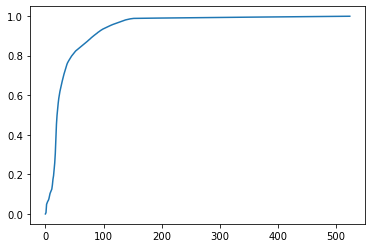

In [441]:
cumulative_coverage_df = pd.DataFrame(cumulative_coverage)
cumulative_coverage_df.percent_covered.plot()

In [405]:
diff_df = pd.Series(diffs).dt.components
diff_df['abs_diff'] = None
# diff_df.loc[days <0, abs_diff] = timedelta(minutes)
diff_df.minutes - timedelta(minutes=60)
# diff_series.loc[diff_series.dt.orig.]
# diff_series.loc[diff_series ]

TypeError: unsupported operand type(s) for -: 'numpy.ndarray' and 'Timedelta'

When we look at the deviations from the device status times attached to the 

In [357]:
df.columns.str.startswith('openaps')
len(df.columns)

506

In [359]:
full_device_status.shape

(53877, 655)

In [362]:
ds_indices = [x[0] for x in v[1]]
ds_test = full_device_status.loc[full_device_status.devicestatusid.isin(ds_indices), ~full_device_status.columns.str.startswith('openaps')]
print(ds_test.iloc[:, 0:12])
print(ds_test.iloc[:12:25])

       NSCLIENT_ID                       _id                created_at  \
8631  1.521233e+12  5aac2cc5211b530848413ec8 2018-03-16 20:44:19+00:00   
8632  1.521233e+12  5aac2ca5211b530848413ec7 2018-03-16 20:44:14+00:00   
8633  1.521233e+12  5aac2c98211b530848413ec6 2018-03-16 20:44:02+00:00   
8634  1.521233e+12  5aac2c98211b530848413ec5 2018-03-16 20:43:55+00:00   
8635  1.521233e+12  5aac2c97211b530848413ec4 2018-03-16 20:43:51+00:00   

     pump/extended/ActiveProfile  pump/extended/PumpIOB  \
8631                     Default                    NaN   
8632                     Default                    NaN   
8633                     Default                    NaN   
8634                     Default                    NaN   
8635                     Default                    NaN   

      pump/extended/BaseBasalRate pump/extended/LastBolus  \
8631                          NaN                     NaN   
8632                          NaN                     NaN   
8633             

In [369]:
full_device_status['pump/extended/PumpIOB'].describe()
full_device_status['openaps/iob/activity'].describe()

count    47354.000000
mean         0.013814
std          0.014004
min         -0.008400
25%          0.003800
50%          0.011200
75%          0.019800
max          0.134500
Name: openaps/iob/activity, dtype: float64

In [374]:
na_sums = full_device_status.isna().sum()
l = len(full_device_status)
na_frac = [np.round(1-x/l, 2) for x in na_sums]
list(zip(na_sums, na_frac, full_device_status.columns))[0:50]

[(2758, 0.95, 'NSCLIENT_ID'),
 (0, 1.0, '_id'),
 (0, 1.0, 'created_at'),
 (23606, 0.56, 'pump/extended/ActiveProfile'),
 (27776, 0.48, 'pump/extended/PumpIOB'),
 (27776, 0.48, 'pump/extended/BaseBasalRate'),
 (27937, 0.48, 'pump/extended/LastBolus'),
 (23606, 0.56, 'pump/extended/Version'),
 (27937, 0.48, 'pump/extended/LastBolusAmount'),
 (23606, 0.56, 'pump/reservoir'),
 (23606, 0.56, 'pump/clock'),
 (23606, 0.56, 'pump/status/timestamp'),
 (23606, 0.56, 'pump/status/status'),
 (23606, 0.56, 'pump/battery/percent'),
 (0, 1.0, 'device'),
 (2758, 0.95, 'uploaderBattery'),
 (40987, 0.24, 'pump/extended/TempBasalAbsoluteRate'),
 (40987, 0.24, 'pump/extended/TempBasalRemaining'),
 (40987, 0.24, 'pump/extended/TempBasalStart'),
 (51119, 0.05, 'uploader/battery'),
 (6523, 0.88, 'openaps/iob/iob'),
 (6523, 0.88, 'openaps/iob/time'),
 (6523, 0.88, 'openaps/iob/activity'),
 (6523, 0.88, 'openaps/iob/basaliob'),
 (6523, 0.88, 'openaps/suggested/bg'),
 (6523, 0.88, 'openaps/suggested/temp'),
 (1

## Conclusion
